In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input/california-housing-prices'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/california-housing-prices/housing.csv


# About this dataset
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
# Loading the dataset
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [3]:
# Displaying the first 5 rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#dataset size
print('Dataset Shape'"\n")
data.shape

Dataset Shape



(20640, 10)

The dataset has 20640 rows and 10 columns.

In [5]:
# Displaying the columns in the dataset
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# Checking the data types of the variables
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#Checking for null/missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Calculating the percentage of missing values to decide weather to drop them or not.
missing_values = data.isnull().sum()
#total cells
total_cells = np.product(data.shape)
print("Total cells:",total_cells)
print("="*50)
#total missing values
total_missing = missing_values.sum()
print("Total missing/null values:",total_missing)
print("="*50)
#Percentage of missing values
percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing values: {:.2f}%".format(percent_missing))

Total cells: 206400
Total missing/null values: 207
Percentage of missing values: 0.10%


The Percentage of missing values is very small i.e 0.10%.Dropping them is not necessary as they may not have a major impact on the dataset.Therefore we will not drop our missing values.

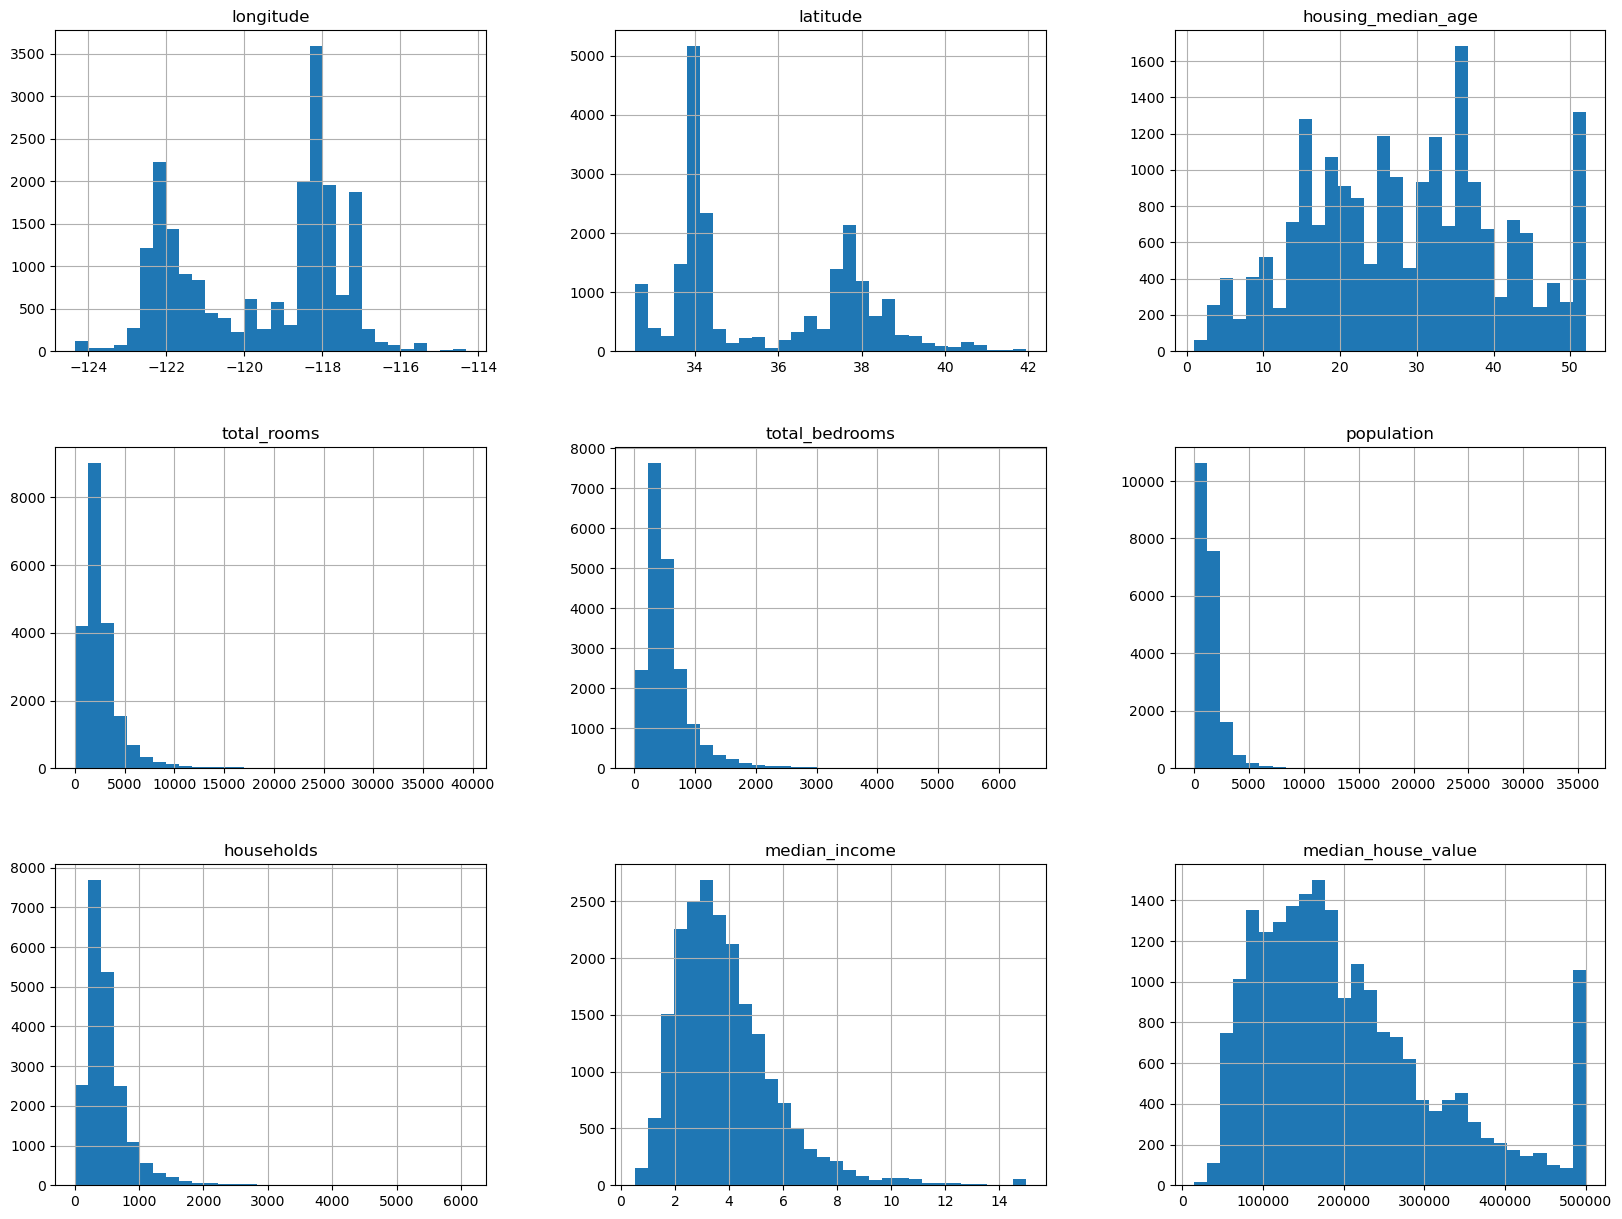

In [10]:
#Histograms of the numerical variables in our dataset
data.hist(bins=30, figsize=(20,15))
plt.show()

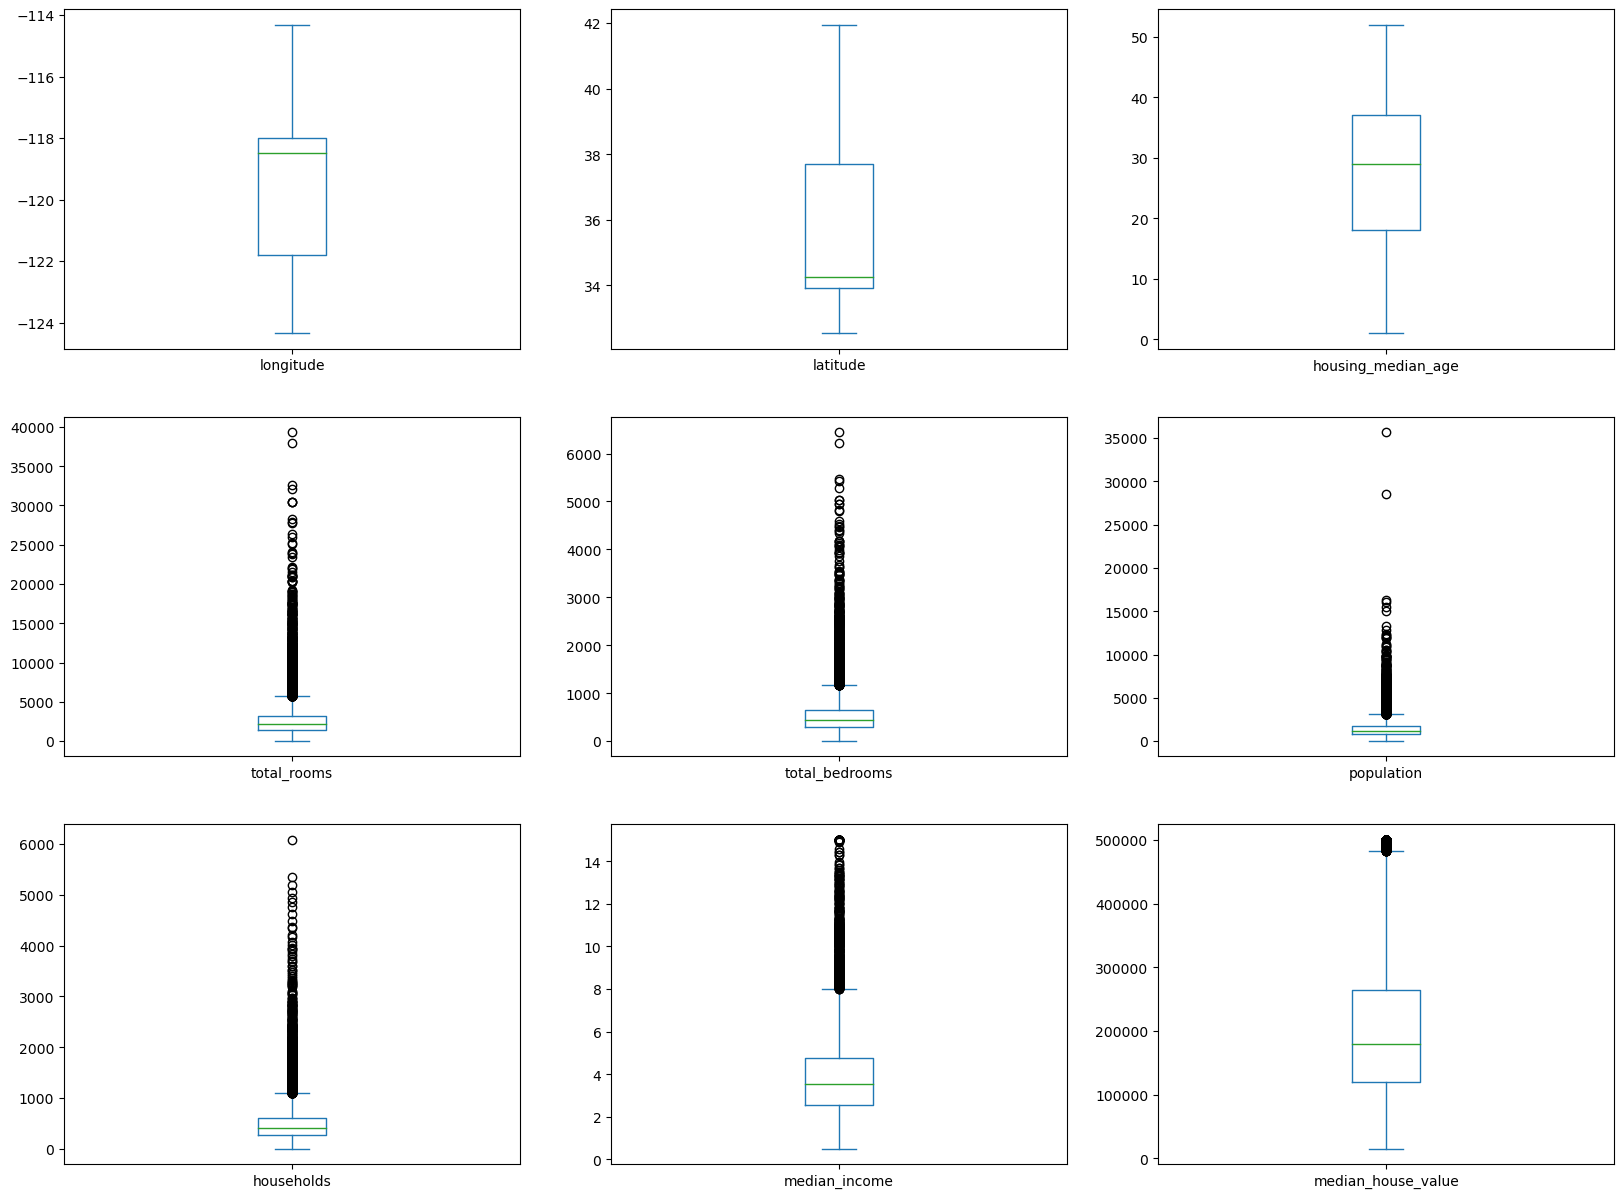

In [11]:
# box plots of the numerical variables
data.plot(kind="box", subplots=True, layout=(3,3), figsize=(20,15))
plt.show()

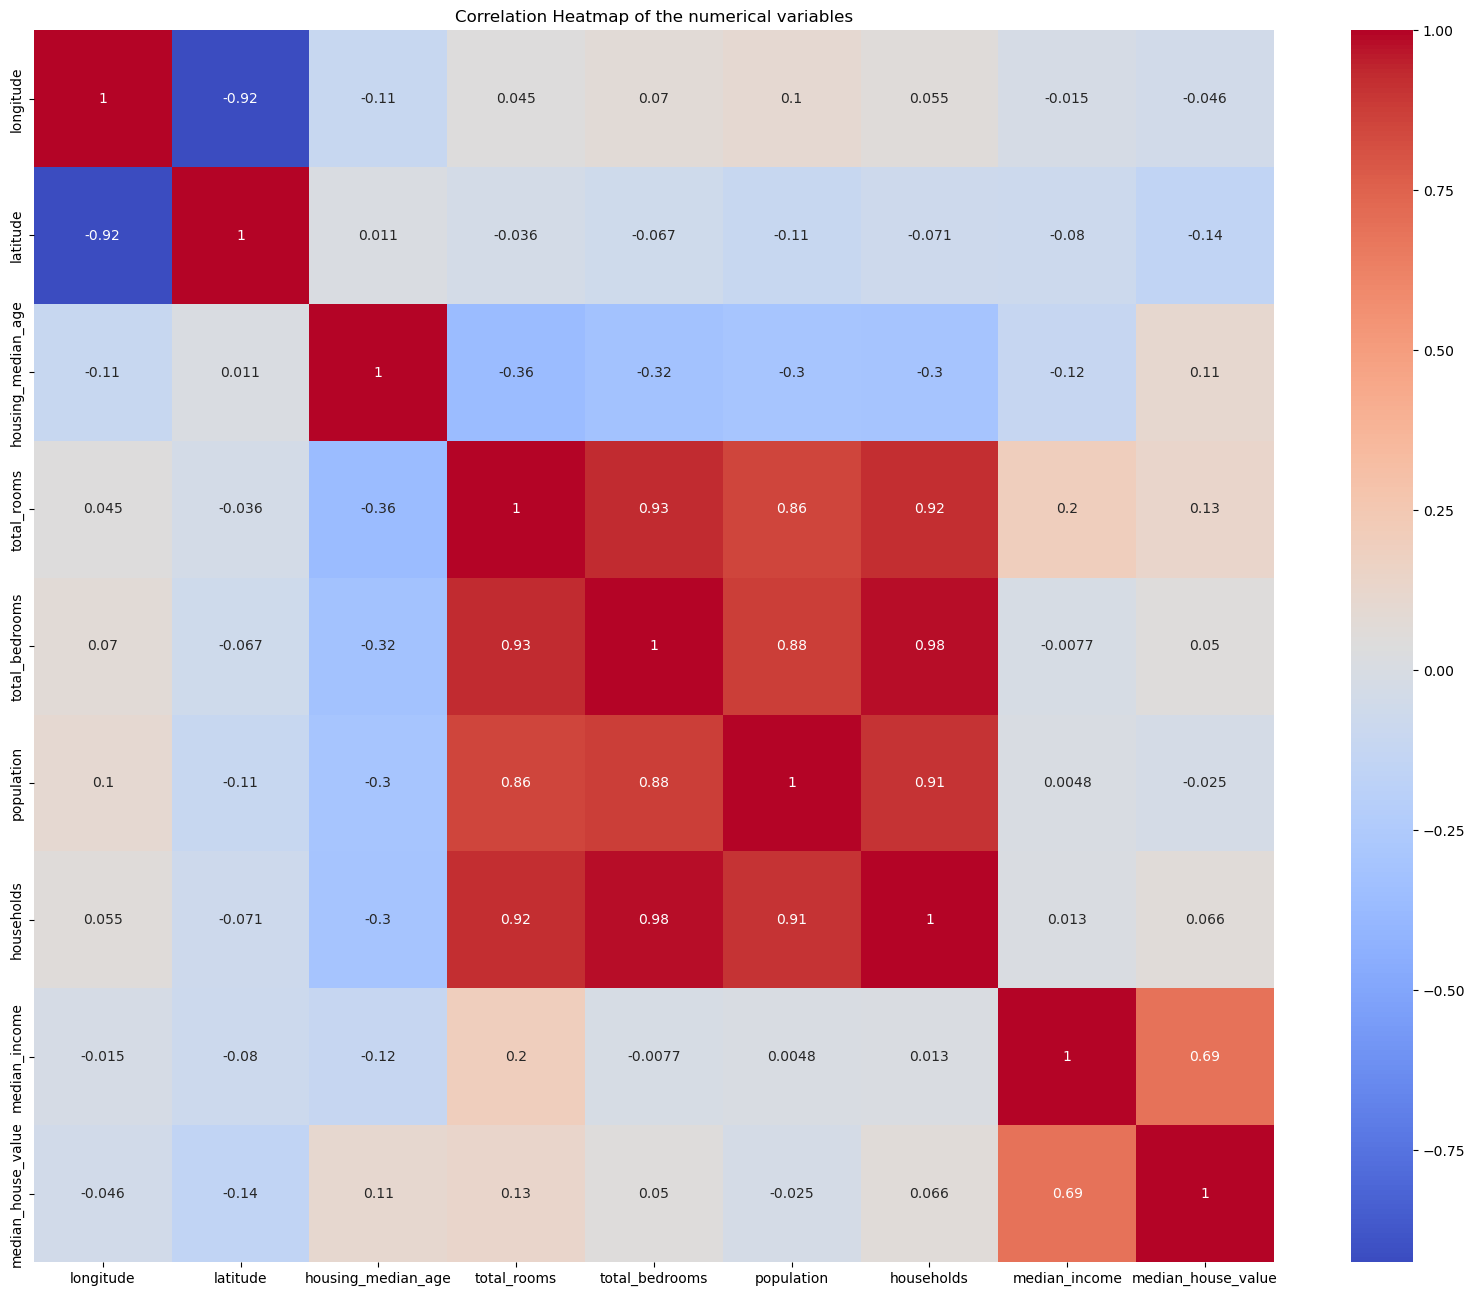

In [12]:
# Correlation matrix of the numerical variables
corr_matrix = data.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of the numerical variables')
plt.show()

# Exploration

1. Total Households

In [13]:
locations = len(data.index)
total_households = data['households'].sum()
print("There are {:.2f} households(a group of people residing within a home unit) at {:.2f} different locations across California.".format(total_households,locations))

There are 10310499.00 households(a group of people residing within a home unit) at 20640.00 different locations across California.


2. Count of Houses by Ocean Proximity

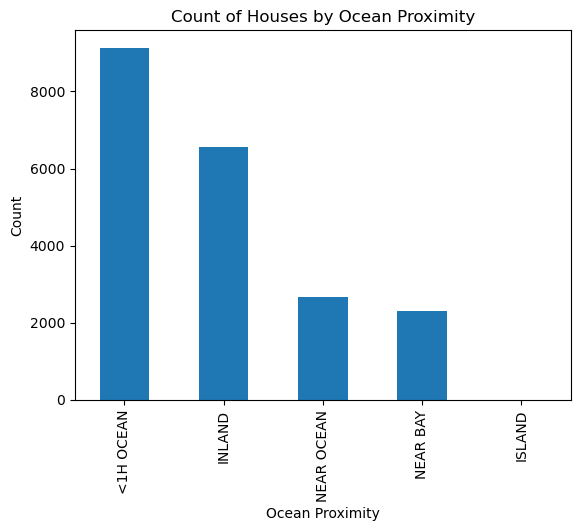

In [14]:
data["ocean_proximity"].value_counts().plot(kind="bar")
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")
plt.title("Count of Houses by Ocean Proximity")
plt.show()

It can be observed from the graph above (Count of Houses by Ocean Proximity) that there are more houses situated 1 hour away from ocean (<1H OCEAN) as compared to other areas. It is followed by houses that are situated inland (INLAND ).Very few houses are situated in islands.

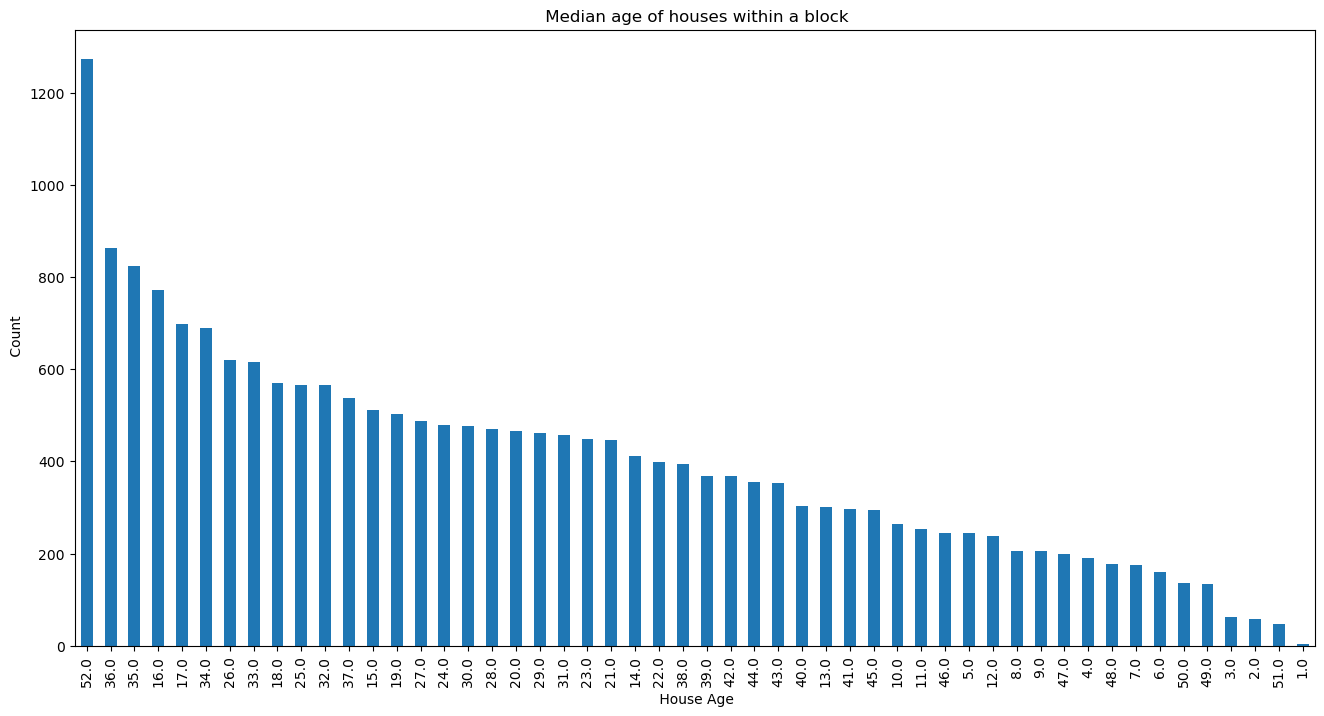

In [15]:
plt.figure(figsize=(16,8))
data['housing_median_age'].value_counts().plot(kind='bar')
plt.title(" Median age of houses within a block")
plt.xlabel(" House Age")
plt.ylabel(" Count")
plt.show()

From the graph above we can observe that majority of the houses in California are about 52 years.

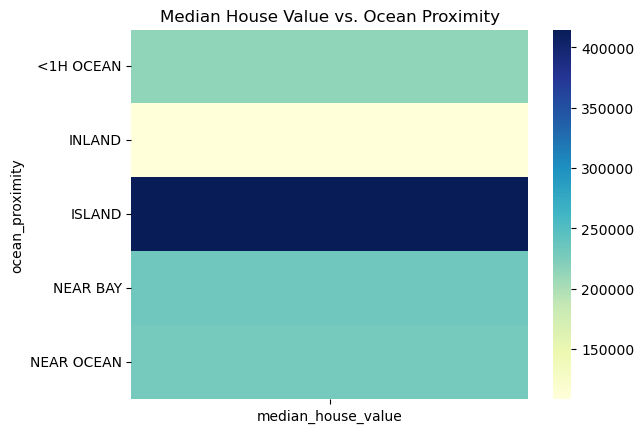

In [16]:
# Creating a pivot table with Median House Value vs. Ocean Proximity
pivot_table = data.pivot_table(values='median_house_value', index='ocean_proximity', aggfunc='median')

# Creating the heatmap using Seaborn
sns.heatmap(pivot_table, cmap="YlGnBu")

plt.title("Median House Value vs. Ocean Proximity")

plt.show()

From the heatmap above (Median House Value vs. Ocean Proximity):Houses situated in Islands are of higher value compared to the other loactions while houses situated in Inland are of relatively low value.Also the further away you go from the ocean, the lower the median house value becomes.

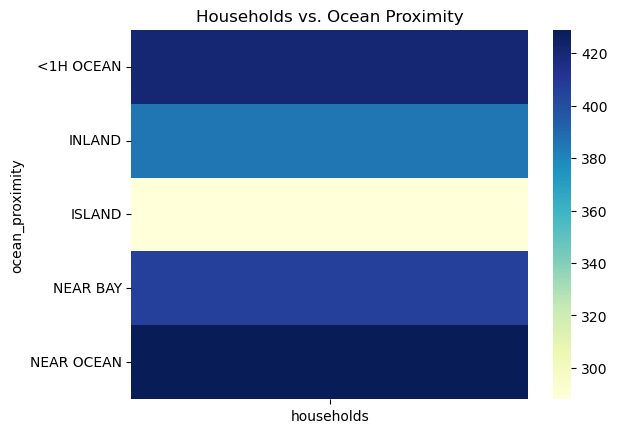

In [17]:
# Creating a pivot table with Households vs. Ocean Proximity
pivot_table = data.pivot_table(values='households', index='ocean_proximity', aggfunc='median')

# Creating the heatmap using Seaborn
sns.heatmap(pivot_table, cmap="YlGnBu")

plt.title("Households vs. Ocean Proximity")

plt.show()

From the heatmap above (Households vs Ocean Proximity):We can observe that there are more households situated Near Ocean and  1 hour away from ocean ( (<1H OCEAN) as compared to other areas. Islands have very few households.

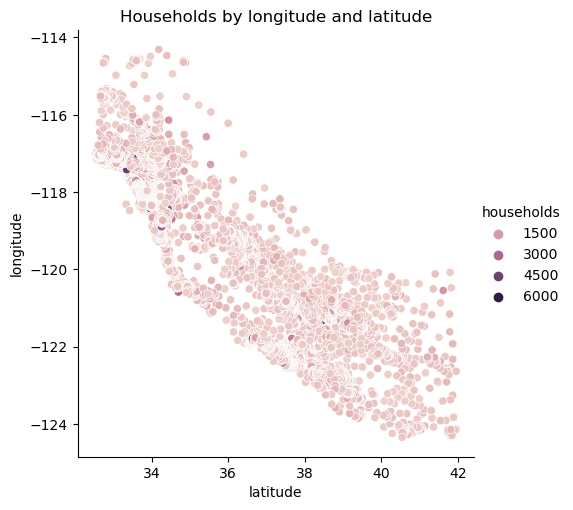

In [18]:
#Households by longitude and latitude
sns.relplot(data= data, x="latitude", y="longitude", hue="households")
plt.title("Households by longitude and latitude")
plt.show()

From the relationship plot above (Households by longitude and latitude):There are more households further North.